import

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Load Data

Here, we will use the Iris dataset as an example, which is a classification dataset containing flower species data.

In [3]:
data = load_iris()
X = data.data  # Features
y = data.target  # Target (species)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Create a Random Forest Model (Bagging)

In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy:.2f}")


Accuracy of Random Forest: 1.00


Visualizing the Decision Trees in Random Forest

You can visualize one of the decision trees in the Random Forest to understand how the individual trees behave.

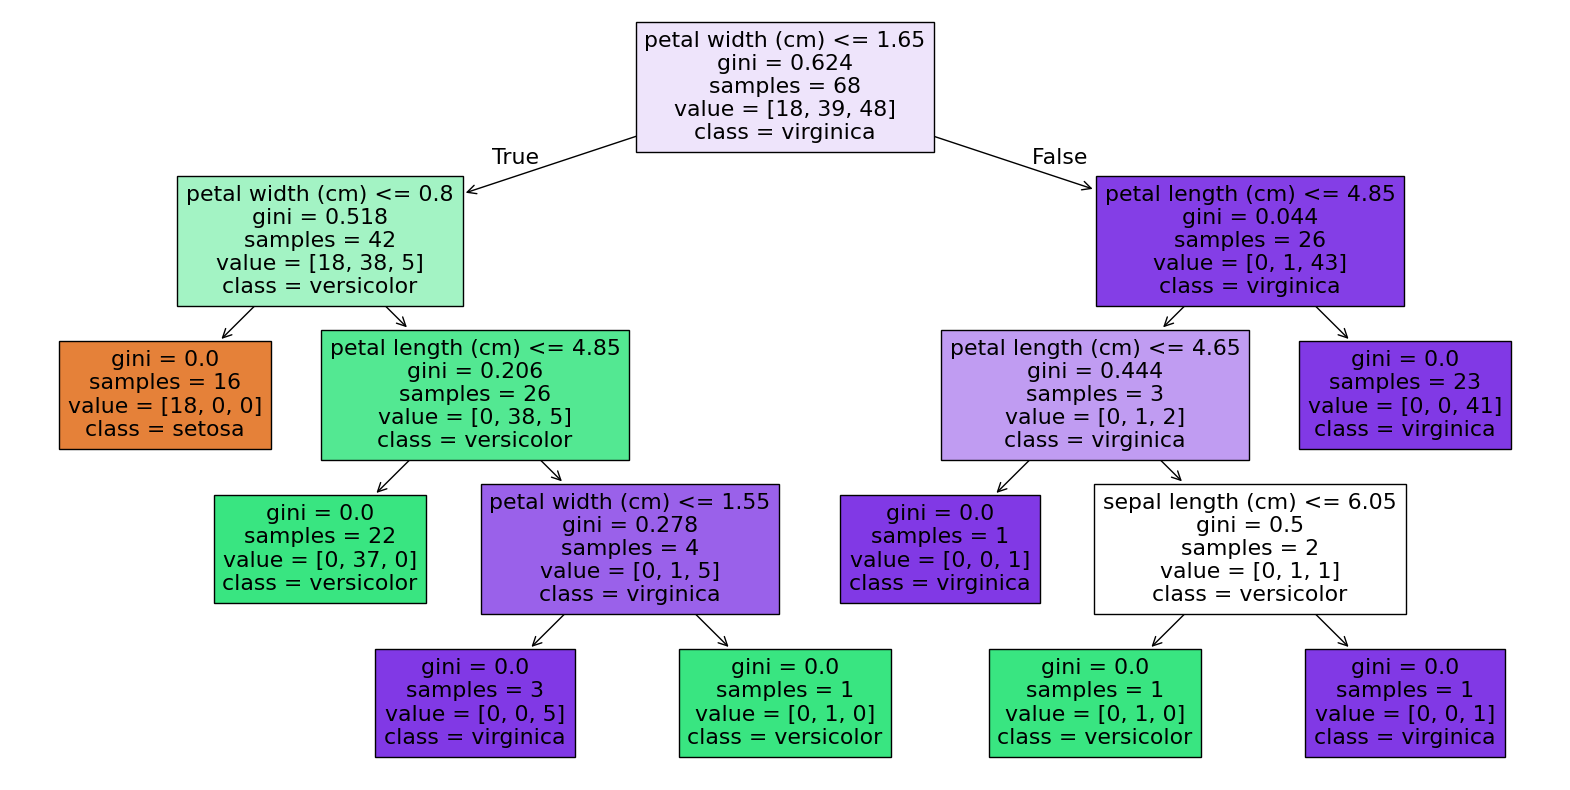

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()


Bagging with Other Models

Although Random Forest is a popular example of bagging, you can apply bagging to other models too, such as decision trees, support vector machines, etc. Scikit-learn provides a general-purpose BaggingClassifier or BaggingRegressor for using bagging with various models.

Bagging with Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print(f"Accuracy of Bagging with Decision Trees: {accuracy_bagging:.2f}")


Accuracy of Bagging with Decision Trees: 1.00


#### **Pros and Cons of Bagging**

##### **Pros:**

-   **Reduces Overfitting**: Bagging can reduce the variance of models like decision trees, which are prone to overfitting.
-   **Improved Accuracy**: By averaging predictions, bagging often leads to better accuracy than a single model.
-   **Works well for high-variance models**: Bagging is particularly useful when applied to high-variance models (e.g., decision trees).

##### **Cons:**

-   **Computationally Expensive**: Since multiple models are trained, bagging can be computationally expensive.
-   **Limited by Base Model**: If the base model performs poorly, the ensemble may not significantly improve performance.
-   **Harder to Interpret**: The aggregated result of multiple models can be harder to interpret than a single model.

#### **Summary of Bagging and Random Forest**

-   **Bagging** involves training multiple models independently on different bootstrapped samples of the data and aggregating the results to improve performance.
-   **Random Forest** is a type of bagging method where multiple decision trees are trained and the final prediction is made by combining the results of all trees.
-   **BaggingClassifier** and **BaggingRegressor** allow you to apply bagging with other models (like SVM, KNN, etc.).